# Exercise:  Gauss Histogram Fitting 

This example shows how to fit an histogram using ROOT 

Create First an empty histogram with 50 bins with range [-10,10]

Fill the histogram with 10000 Gaussian Random number with mean=1 and sigma=2

Note, we could also use the function h1.FillRandom("gaus"), but we need to set the right parameters of the Gaussian function before.

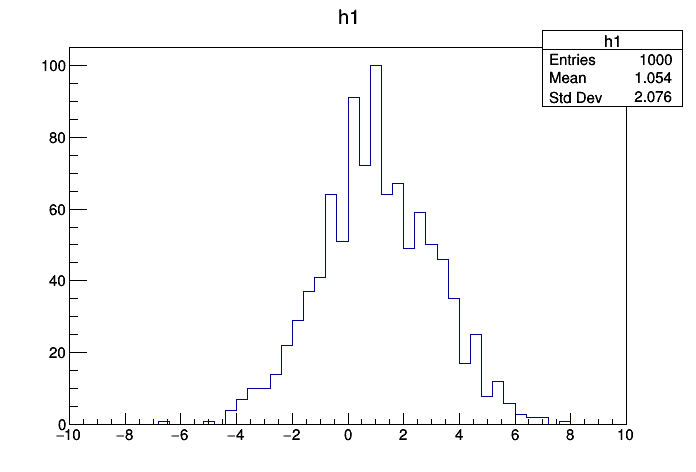

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [3]:
h1->Draw(); 
gPad->Draw();

### Part1: Fit the Histogram with a Gaussian function

Note that before fitting we need to create the fitting function and set its initial parameter values. 
For a Gaussian function the setting of initial values is not really needed, because they can be computed automatically by ROOT. 

In [4]:
// declare here some variables which will be used afterwards
TF1 * f1 = nullptr; 
TFitResultPtr res; 

Create the Gaussian Fit function

Set the initial parametger values (e.g. Constant = 100, mean = 0, sigma =1)

Fit now the histogram using the Fit method in ROOT. By default the least-square method is used. 
For likelihood fits we need to use the option "L", for Pearson chi-square (expected error) , option "P".

Use also  option "S" to create a TFitResult object that is returned to the user.
To compute the error using MINOS, use the "E" option


 FCN=35.8313 FROM MINOS     STATUS=SUCCESSFUL     21 CALLS         171 TOTAL
                     EDM=4.34905e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     7.40284e+01   3.02687e+00  -2.34163e-02   1.36540e-04
   2  Mean         1.02275e+00   6.85129e-02  -4.53464e-04  -6.98304e-03
   3  Sigma        2.08774e+00   5.45912e-02   5.45912e-02   8.36253e-02


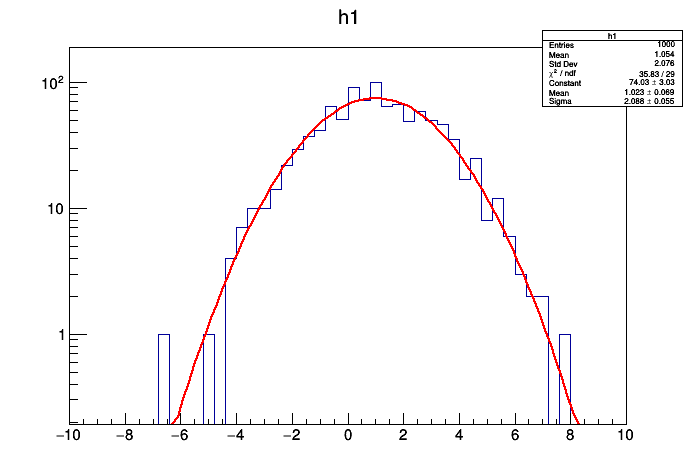

In [8]:
gStyle->SetOptFit(1);
gPad->SetLogy(true); // to set log scale in y
gPad->Draw();

Print the result of the Fit from the returned TFitResult object


****************************************
Minimizer is Minuit / Migrad
Chi2                      =      35.8313
NDf                       =           29
Edm                       =  4.34905e-11
NCalls                    =           84
Constant                  =      74.0284   +/-   3.02687     
Mean                      =      1.02275   +/-   0.0685129   
Sigma                     =      2.08774   +/-   0.0545912    	 (limited)


Get the correlation matrix of the fit from the TFitResult class and print it 


3x3 matrix is as follows

     |      0    |      1    |      2    |
--------------------------------------------
   0 |          1    0.007838     -0.6161 
   1 |   0.007838           1    -0.02071 
   2 |    -0.6161    -0.02071           1 



In [11]:
std::cout  << "Gaussian sigma = " << f1->GetParameter("Sigma") << "  +/- " << f1->GetParError(f1->GetParNumber("Sigma")) << std::endl;

Gaussian sigma = 2.08774  +/- 0.0545912


If we want to access the MINOS asymmetric error, we can get them from the FitResult object

In [12]:
std::cout  << "Gaussian sigma = " << res->Parameter(2) << "  + " << res->UpperError(2) << "  " << res->LowerError(2) << std::endl;

Gaussian sigma = 2.08774  + 0.0547402  -0.0544955


### Part 2:  Fit Bias Study

We study now the Fit Bias for the sigma parameter. We can look at the difference obtained by using 3 different fit methods: 

1. Chisquare fit using the observed error (default case in ROOT) 
2. Chisquare fit using the expected error (option "P" - Pearson chi2)
3. Binned maximum likelihood fit (option "L")

In [13]:
TH1 * hs = nullptr;

In [14]:
hs = new TH1D("hs","Sigma pull distribution",50,-5,5);

Generate 1000 pseudo-experiments, where for each one of them generate an histogram as above (50 bins, in [-10,10] and fill it with 1000 Gaussian distributed numbers with $\mu=1$ and $\sigma=2$. 
For each pseudo-experiment, fit the histogram and look at the obtained $\sigma$ value from the fit. 
Fill the *Sigma pull histogram*, *hs* with $(\sigma_{FIT} - \sigma_{TRUE})/\sigma_{FIT-ERROR}$. 

$\sigma_{TRUE} = 2$ in this case and $\sigma_{FIT-ERROR}$ is the uncertainty obtained from the fit.

Do for one of the three cases (Neyman chi2 (default), Likelihood fit (option *L*) or Pearson chi2 (option *P*)

In [37]:
hs->Reset(); // in case we run a second time
for (int iexp = 0; iexp < 1000; ++iexp) { 

    
    
}    

Fit the obtained Pull distribution with a Gaussian function

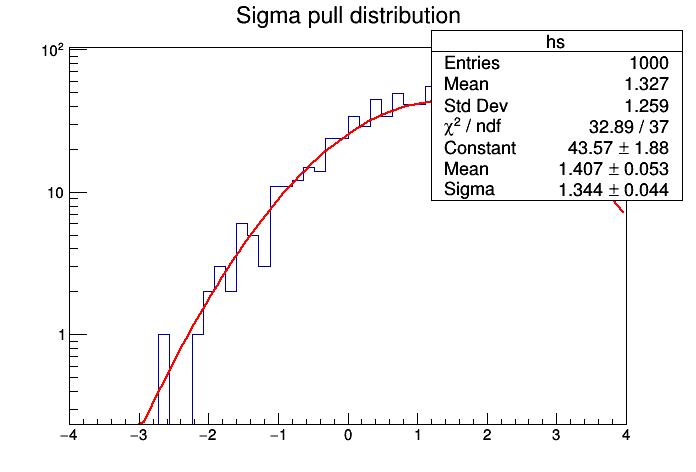

 FCN=32.888 FROM MIGRAD    STATUS=CONVERGED      67 CALLS          68 TOTAL
                     EDM=9.71287e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.35718e+01   1.87591e+00   4.15121e-03   6.07857e-06
   2  Mean         1.40669e+00   5.28813e-02   1.38598e-04  -1.32539e-04
   3  Sigma        1.34365e+00   4.37347e-02   2.34254e-05   4.67991e-03


### Part 3:  Study the chi2 distribution

Using the likelihood definition described in the Baker-Cousins paper we can use the likelihood at the minimum as a chi2. We study its distribution using pseudo-experiments.
We can compare what we obtain if we use the Baker-Cousins likelihood-value in a likelihood fit or the chi2 obtained when doing a
chi2 Fit (Neyman or Pearson chi2). 

In [17]:
TH1 * hchi = nullptr;
TF1 * fchi = nullptr; 

In [18]:
hchi = new TH1D("hchi","chi-squared distribution",100,0,100);

The Baker-Cousins likelihood-value is obtained from the FitResult class as 
$2 \times$ *result->MinFcnValue()*
*result->Chi2()* returns instead the Chi2 obtained from the data-function resuduals.

Genersate now 10000 pseudo-experiments and for each of them create, fill and fit an histogram as before. 
But now make an histogram of the chi2 distribution, either using *2 result->MinFcnValue()* if doing a likelihood fit or
using *result->Chi2()* in case of a chi2 fit

In [31]:
hchi->Reset(); // in case we run a second time
for (int iexp = 0; iexp < 10000; ++iexp) { 
  
}

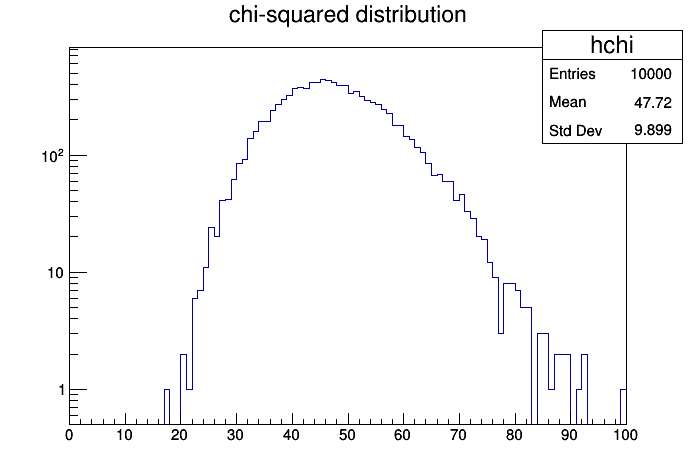

In [32]:
hchi->Draw(); gPad->Draw();

Fit the obtained chi2 distribution with a chi2 probability density function
using as function parameter a constant and the number of degree of freedom of the chi2. 

In [ ]:
fchi = new TF1("fchi","[0]*ROOT::Math::chisquared_pdf(x,[1])",0,100);
fchi->SetParameters(hchi->GetEntries()*hchi->GetBinWidth(1), hchi->GetMean());

In [33]:
hchi->Fit(fchi,"L");

 FCN=36.7462 FROM MIGRAD    STATUS=CONVERGED      30 CALLS          31 TOTAL
                     EDM=8.65428e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           9.99914e+03   9.99964e+01   4.21291e-01   1.58918e-09
   2  p1           4.76988e+01   9.66641e-02   4.07363e-04   9.62387e-04
                               ERR DEF= 0.5


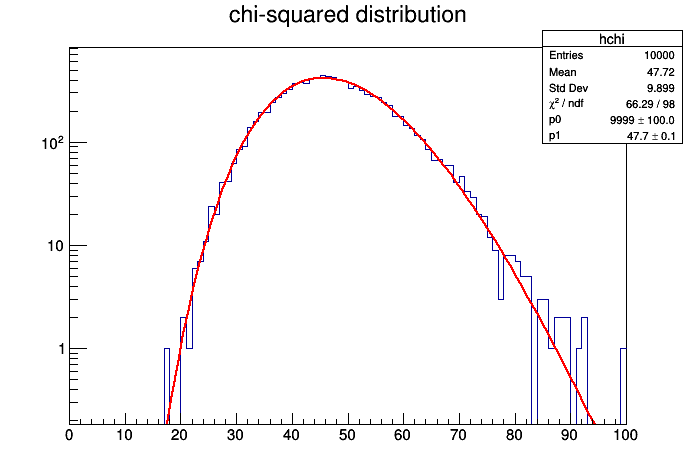

In [34]:
hchi->Draw(); gPad->Draw();

Which of the two obtained quantities (Baker-Cousins lieklihood or Neyman chi2) agree better with a real chi2 distribution ? 